In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin

/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/

### Import the Data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# now split into validation data, too
x_train, x_val, y_train, y_val = train_test_split( x_train, y_train, 
                                                  test_size=0.83333, 
                                                  random_state=42)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_val = x_val.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_val = np.expand_dims(x_val, -1)




print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)

print(x_train.shape[0], "train samples")
print(x_val.shape[0], "validation samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)


x_train shape: (10000, 28, 28, 1)
x_val shape: (50000, 28, 28, 1)
10000 train samples
50000 validation samples
10000 test samples


### Build Model
With a softmax activation function to use temperature scaling.

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
____

### Train the Model

In [4]:
batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          validation_split=0.0, 
          validation_data = (x_val,
                             y_val))

Train on 10000 samples, validate on 50000 samples
Epoch 1/3
  128/10000 [..............................] - ETA: 6s - loss: 2.2724 - acc: 0.1484

2022-01-12 15:49:49.547273: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-01-12 15:49:49.570083: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3299990000 Hz
2022-01-12 15:49:49.571714: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x105f010 executing computations on platform Host. Devices:
2022-01-12 15:49:49.571758: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2022-01-12 15:49:49.622001: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) or se

10000/10000 [==============================] - 3s 295us/sample - loss: 1.0278 - acc: 0.6849 - val_loss: 0.3034 - val_acc: 0.9158
Epoch 2/3
10000/10000 [==============================] - 3s 276us/sample - loss: 0.2963 - acc: 0.9069 - val_loss: 0.1992 - val_acc: 0.9407
Epoch 3/3
10000/10000 [==============================] - 3s 282us/sample - loss: 0.2137 - acc: 0.9322 - val_loss: 0.1507 - val_acc: 0.9567


In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.13546126974523068
Test accuracy: 0.9609


In [6]:
predict = model.predict(x_val) # this gives the softmax-output for all 10 classes

In [7]:
np.argmax(predict,axis=-1) # this yields the class prediction

array([7, 3, 8, ..., 2, 0, 2])

In [8]:
y_val_hat = model.predict_classes(x_val)
print(y_val_hat)  # this also yields the class prediction

[7 3 8 ... 2 0 2]


In [9]:
for i in range(5):
    print(sum(predict[i,:])) # adds up to approx. 1

1.0000000876253754
1.000000100929817
0.9999999543142621
1.0000000092454684
1.0000000334827321


### Temperature Scaling

Based on arXiv:1706.04599:First define a function to calculate the expected confidence error (eq. (3)). Then define a function to scale the temperature T of the softmax-prediction (eq. (9)). Finally, optimise the negative log likelihood (eq. (6)) with respect to the temperature T (T is "hidden" in the re-scaled softmax-probability).

#### ECE

Define Bins and compute their expected confidence error

(50000,)


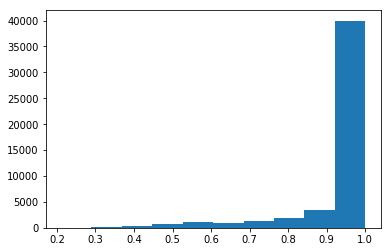

[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [10]:
Maxima = predict.max(axis=1)
print(Maxima.shape)
plt.hist(Maxima)
plt.show()
Borders = np.arange(0.2,1.01,0.1) # borders of the bin intervals
print(Borders)

In [11]:
for i in range(len(Borders)-1):
    Blower = Borders[i]
    Bupper = Borders[i+1]
    Logical_in_bin = (Blower<Maxima)*(Bupper>Maxima) # wich instances are in the ith bin?
    
    x_Bin_i = x_val[Logical_in_bin,:]
    y_Bin_i = y_val[Logical_in_bin]
    y_Bin_i = np.argmax(y_Bin_i, axis = -1)
    Confidence_Bin_i = Maxima[Logical_in_bin]
    y_hat_Bin_i = y_val_hat[Logical_in_bin]
    
    
    print(round(Blower,1), round(Bupper,1),sum(Logical_in_bin), 
          round(np.mean(Confidence_Bin_i),3),  # what is the mean confidence of the bin?
          round(np.mean(y_hat_Bin_i == y_Bin_i),3)) # what is the accuracy of the bin?
    
print(Logical_in_bin)
print(Maxima)

0.2 0.3 42 0.274 0.286
0.3 0.4 277 0.362 0.419
0.4 0.5 723 0.457 0.483
0.5 0.6 1260 0.551 0.601
0.6 0.7 1296 0.65 0.731
0.7 0.8 1863 0.754 0.832
0.8 0.9 3304 0.857 0.93
0.9 1.0 41235 0.984 0.995
[ True  True  True ...  True  True False]
[0.99897456 0.99937683 0.9940339  ... 0.96963173 0.99987364 0.6274244 ]


Interestingly, this is actually underconfident!

In [12]:
def ECE_df(Model, X, Y_binary):
    # Takes keras Model, validation data X/Y and returns the confidence vs accuracy
    
    Y = np.argmax(Y_binary, axis = -1) # transform the encoded y-label into actual class labels
    Borders = np.arange(0.1,1.01,0.1) # interval borders of the bins
    Pred = Model.predict(X)  # softmax prediction/confidence
    Y_hat = Model.predict_classes(X) # class label prediction
    Max = Pred.max(axis=-1) # how large is softmax confidence for the predicted label
   
    Output = pd.DataFrame({})
    
    # loop over the bins
    for i in range(len(Borders)-1):
        B_lower = Borders[i]
        B_upper = Borders[i+1]
        Logical_in_Bin = (B_lower<Max)*(B_upper>Max) # wich instances are in the ith bin?
        
        if(sum(Logical_in_Bin)>10): # else: not enough instances to make any real inference
            X_Bin_i = X[Logical_in_Bin,:]
            Y_Bin_i = Y[Logical_in_Bin]
            confidence_Bin_i = Max[Logical_in_Bin] # confidence of the predicions in ith Bin
            Y_hat_Bin_i = Y_hat[Logical_in_Bin]
         
            Output = Output.append({'B_lower': B_lower,
                                    'B_upper': B_upper,
                                   'Number of Instances': sum(Logical_in_Bin),
                                   'Confidence': np.mean(confidence_Bin_i),
                                   'Accuracy': np.mean(Y_hat_Bin_i == Y_Bin_i)},
                                  ignore_index=True)
    
    
    return(Output)
                                   
                                   
            
            
        

In [13]:
ECE_DF = ECE_df(model, x_val, y_val)

   B_lower  B_upper  Number of Instances  Confidence  Accuracy
0      0.2      0.3                 42.0    0.274337  0.285714
1      0.3      0.4                277.0    0.362163  0.418773
2      0.4      0.5                723.0    0.457361  0.482711
3      0.5      0.6               1260.0    0.551323  0.600794
4      0.6      0.7               1296.0    0.650036  0.730710
5      0.7      0.8               1863.0    0.754229  0.831991
6      0.8      0.9               3304.0    0.857421  0.930085
7      0.9      1.0              41235.0    0.984362  0.995004


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


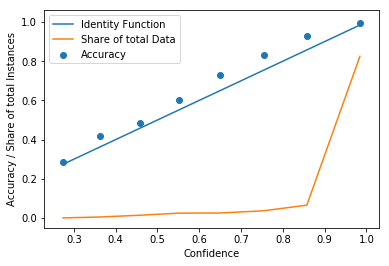

In [14]:
print(ECE_DF)
plt.scatter(ECE_DF["Confidence"], ECE_DF["Accuracy"],
           label="Accuracy")
plt.plot(ECE_DF["Confidence"], ECE_DF["Confidence"],
        label= "Identity Function")
plt.plot(ECE_DF["Confidence"], 
         ECE_DF["Number of Instances"]/sum(ECE_DF["Number of Instances"]),
        label ="Share of total Data")
plt.xlabel("Confidence")
plt.ylabel("Accuracy / Share of total Instances")
plt.legend()
plt.show()

#### Now the temperature function

Because in this interesing case, the model is under- and not overconfident, we expect negative temperature.

In [15]:
def ScaledConfidence(Temp, Model, X):
    # takes Keras Model + Data X and Temperature Temp to return scaled softmax predictions
    Pred = Model.predict(X) # softmax-predictions of the model
    
    LogPred = np.log(Pred) # retrieve the argument of softmax up to an arbitrary constant (here: zero)
    Output = np.exp(LogPred /Temp)
    
    # now the Temperature-Scaled Predictions have to be normalised
    #print(Output.shape,Output.sum(axis=-1))
    Out =  (Output.sum(axis=-1)**(-1.)).reshape(-1,1) * Output
    
    # Sanity check
    #print("Rescaled+Normalised",Out.shape,Out.sum(axis=-1)) # should be 1

    return(Out)

Some test runs show that, as it should, the class prediction stays the same, but the confidence in the model's predictions changes for different temperature values.

In [16]:
SC1 = ScaledConfidence(1, model, x_val)
print(SC1.max(axis=-1))
print(SC1.argmax(axis=-1))

[0.9989745  0.9993767  0.994034   ... 0.96963173 0.9998737  0.6274244 ]
[7 3 8 ... 2 0 2]


In [17]:
SC1 = ScaledConfidence(10,model, x_val)
print(SC1.max(axis=-1))
print(SC1.argmax(axis=-1))

[0.26077792 0.31153983 0.19689338 ... 0.19208655 0.31334004 0.19884017]
[7 3 8 ... 2 0 2]


In [18]:
SC1 = ScaledConfidence(0.1,model, x_val)
print(SC1.max(axis=-1))
print(SC1.argmax(axis=-1))

[1.         0.99999994 1.         ... 1.         0.99999994 0.9974549 ]
[7 3 8 ... 2 0 2]


In [19]:
print(model.predict(x_val).max(axis=-1))
print(model.predict(x_val).argmax(axis=-1))

[0.99897456 0.99937683 0.9940339  ... 0.96963173 0.99987364 0.6274244 ]
[7 3 8 ... 2 0 2]


#### Optimise the Temperature
We're almost done! We now need a score to judge how good the temperature T is.

In [20]:
def ECE(N_per_Bin, Accuracy, Confidence):
    # takes the number of instances per bin, the accuracy per bin and the confidence per bin
    # returns the ECE (equation 3)
    n = sum(N_per_Bin)
    Discrepancy = abs(Accuracy-Confidence)
    ECE_ithBin = N_per_Bin * Discrepancy / n
    return(sum(ECE_ithBin))

In [21]:
def ECE_After_Scaling(Temp, X, Y_binary, Model, BinBorders):
    
    ScaledSoftmax = ScaledConfidence(Temp, Model, X)
    ScaledClassPred = ScaledSoftmax.argmax(axis=-1) # class predictions
    ScaledSMMaximum = ScaledSoftmax.max(axis=-1)
    Y = np.argmax(Y_binary, axis = -1) # transform the binary matrix into real class labels in 1d
    Number_per_Bin = list()
    Confidence = list()
    Accuracy = list()
    
    for i in range(len(BinBorders)-1):
        B_lower = BinBorders[i]
        B_upper = BinBorders[i+1]
        Logical_in_Bin = (B_lower<ScaledSMMaximum)*(B_upper>ScaledSMMaximum) # wich instances are in the ith bin?
        
        if(sum(Logical_in_Bin)>10): # else: not enough instances to make any real inference
            X_Bin_i = X[Logical_in_Bin,:]
            Y_Bin_i = Y[Logical_in_Bin]
            
            
            confidence_Bin_i = ScaledSMMaximum[Logical_in_Bin] # confidence of the predicions in ith Bin
            Y_hat_Bin_i = ScaledClassPred[Logical_in_Bin]
           
            
            Number_per_Bin.append(sum(Logical_in_Bin))
            Confidence.append(np.mean(confidence_Bin_i))
            Accuracy.append(np.mean(Y_hat_Bin_i == Y_Bin_i))
    

    return(ECE(np.array(Number_per_Bin),
               np.array(Accuracy), 
               np.array(Confidence)))

In [22]:
ECE_After_Scaling(1., x_val, y_val, model, np.arange(0.1,1.01,0.1))

0.02050316477179525

In [23]:
ECE_After_Scaling(10., x_val, y_val, model, np.arange(0.1,1.01,0.1))

0.7328708796310425

In [24]:
ECE_After_Scaling(0.5, x_val, y_val, model, np.arange(0.1,1.01,0.1))

0.020988448743592153

In [25]:
T_Optimal = fmin(func = ECE_After_Scaling,
                 x0 = 1., 
                 args=(x_val, y_val, model, np.arange(0.1,1.01,0.1)))

Optimization terminated successfully.
         Current function value: 0.001477
         Iterations: 13
         Function evaluations: 29


In [26]:
T_Optimal

array([0.77197266])

As expected for this unusual case of an underconfident Neural Net, the optimal temperature is below 1.